In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.simulate_markov import simulate_ar1_process, simulate_reflective_random_walk, simulate_positive_recurrent_modulated_random_walk, simulate_arch_1_process
from concurrent.futures import ProcessPoolExecutor
from itertools import repeat
from depth.multivariate import simplicial, halfspace, simplicial, betaSkeleton

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [60]:
# Fix the random seed for reproducibility 
random_seed = 49
np.random.seed(random_seed)

The following simulation generates two independent and identically distributed $AR(1)$ processes ($Y_t$ and $Z_t$), plots both processes and calculates the maximum cumulative difference between the two processes until a given time, that is, an approximation of $||Y_t-Z_t||_{\infty}$.



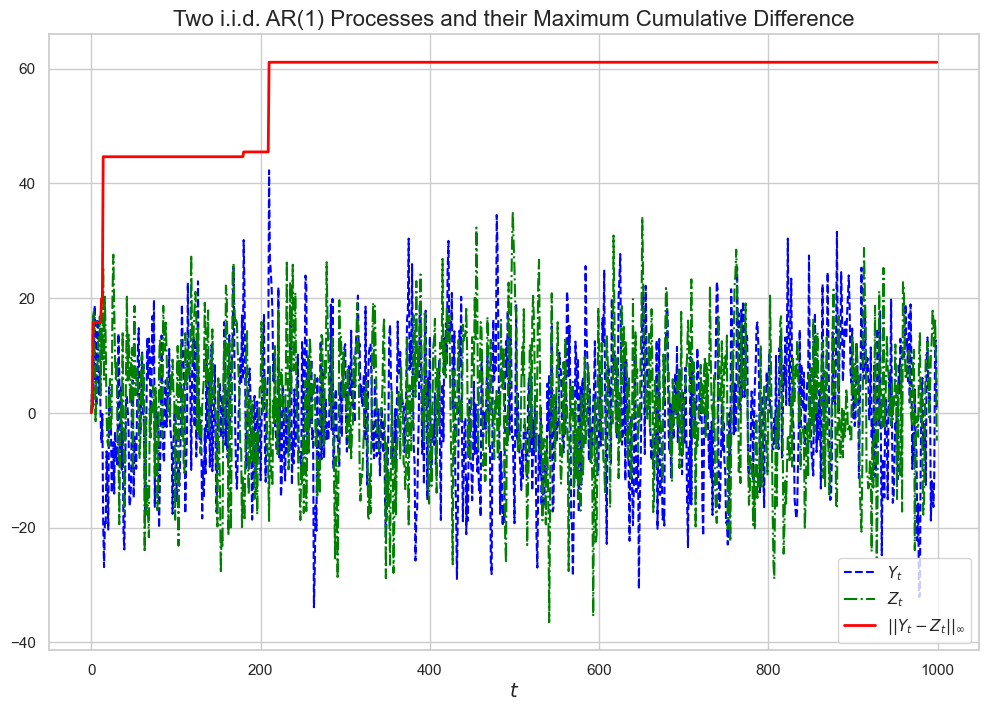

In [4]:
# Set the parameters for the AR(1) process
phi = 0.5
sigma = 10  # Standard deviation of the noise
n_steps = 10**3  # Number of points to simulate

# Set a common initial value for both processes
common_initial_value = 0

processes = simulate_ar1_process(n_steps, phi, sigma, common_initial_value, 2, seed=random_seed)
Y = processes[0]
Z = processes[1]

# Calculate the absolute differences and the cumulative maximum difference
abs_diff = np.abs(Y - Z)
max_diff_cumulative = np.maximum.accumulate(abs_diff)

# Plotting with high contrast colors and LaTeX labels
plt.figure(figsize=(12, 8))
plt.plot(Y, label=r'$Y_t$', linestyle='--', color='blue')
plt.plot(Z, label=r'$Z_t$', linestyle='-.', color='green')
plt.plot(max_diff_cumulative, label=r'$||Y_t-Z_t||_{\infty}$', color='red', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.title('Two i.i.d. AR(1) Processes and their Maximum Cumulative Difference', fontsize=16)
plt.legend(loc='lower right')
plt.show()


In order to estimate the behaviour of $||Y_t-Z_t||_{\infty}$, we will generate $n=10^3$ simulations of the previous experiment and calculate the maximum difference for each simulation.



In [5]:
n_simulations = 10**4

In [6]:
# Run simulations in parallel
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_ar1_process, 
                                repeat(n_steps, n_simulations),
                                repeat(phi, n_simulations),
                                repeat(sigma, n_simulations),
                                repeat(common_initial_value, n_simulations),
                                repeat(2, n_simulations),
                                np.random.randint(0, 2**32, n_simulations)))


Now we will plot the average of $||Y_t-Z_t||_{\infty}$ as a function of the number of steps.

In [7]:
max_diffs_all_simulations = np.zeros((n_simulations, n_steps))
for sim in range(n_simulations):
    Y, Z = results[sim]
    max_diffs_all_simulations[sim, :] = np.maximum.accumulate(np.abs(Y - Z))
# Calculate the expected maximum difference at each time step
expected_max_diffs = np.mean(max_diffs_all_simulations, axis=0)

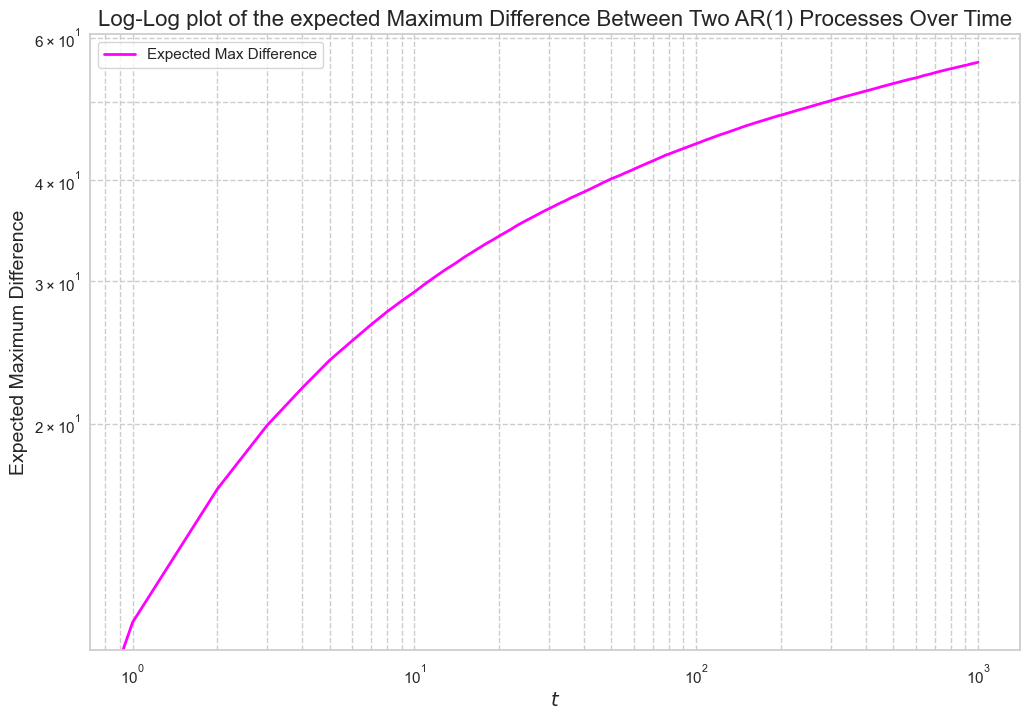

In [8]:
# Plotting the expected maximum difference using a log-log plot
plt.figure(figsize=(12, 8))
plt.loglog(expected_max_diffs, label='Expected Max Difference', color='magenta', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel('Expected Maximum Difference', fontsize=14)
plt.title('Log-Log plot of the expected Maximum Difference Between Two AR(1) Processes Over Time', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

The next plots show the estimated distribution of $||Y_t-Z_t||_{\infty}$ as a function of the number of steps used for the estimation.

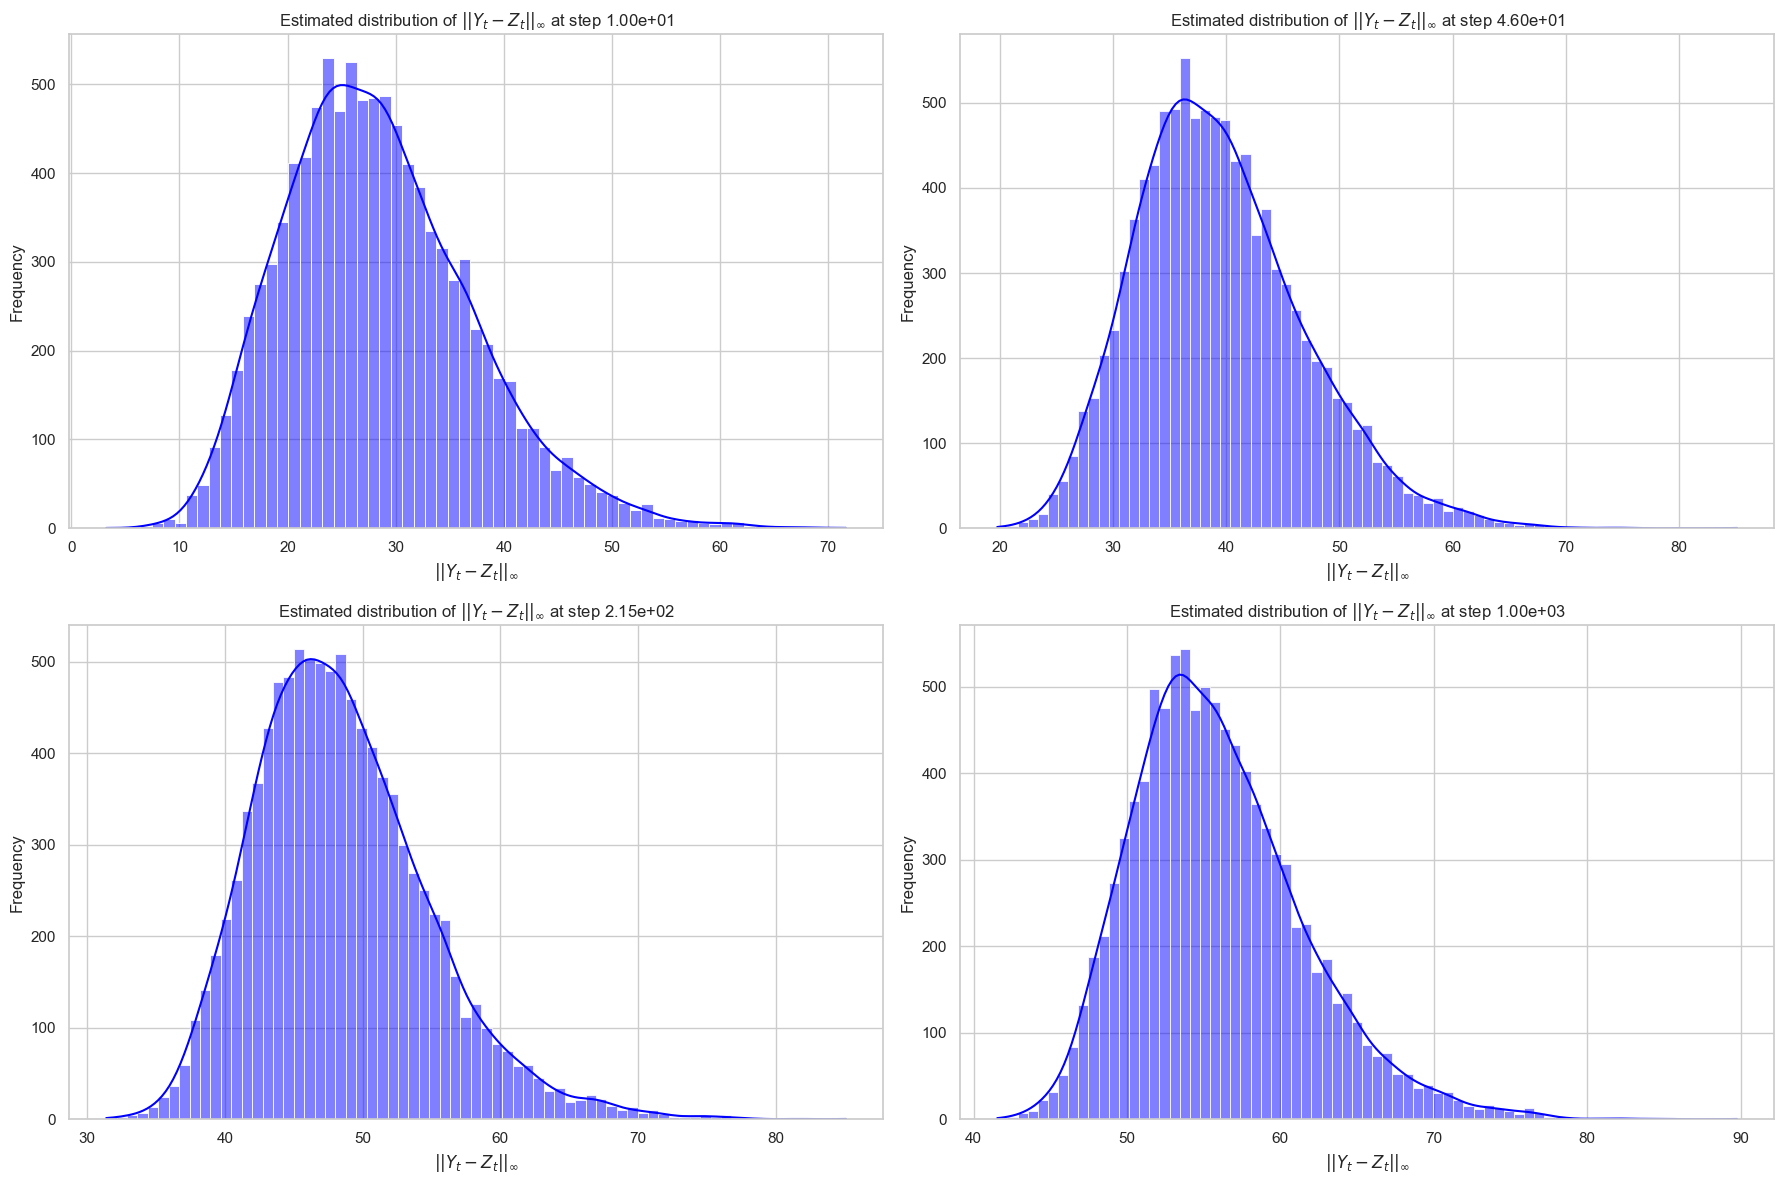

In [9]:
start_step = 10  # Start at 10 steps
selected_steps = np.logspace(np.log10(start_step), np.log10(n_steps), 4, dtype=int)  # Select 4 time steps using logspace

# Set up plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Create a subplot grid
axes = axes.flatten()  # Flatten the array of axes

for i, step in enumerate(selected_steps):
    sns.histplot(max_diffs_all_simulations[:, step-1], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(r'Estimated distribution of $||Y_t-Z_t||_{\infty}$ at step '+f'{step:.2e}')  # Use scientific notation with 2 decimal places for the step number
    axes[i].set_xlabel(r'$||Y_t-Z_t||_{\infty}$')
    axes[i].set_ylabel('Frequency')

# Remove extra subplot (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We will repeat the next experiment 

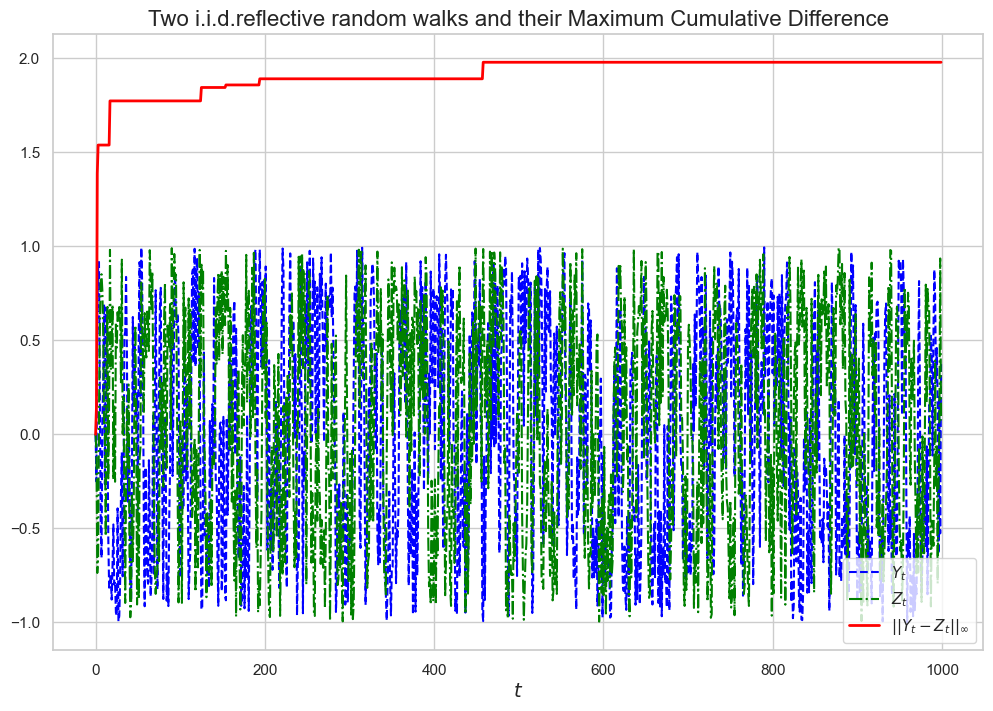

In [10]:
processes = simulate_reflective_random_walk(n_steps, 2, seed=random_seed)
Y = processes[0]
Z = processes[1]

# Calculate the absolute differences and the cumulative maximum difference
abs_diff = np.abs(Y - Z)
max_diff_cumulative = np.maximum.accumulate(abs_diff)

# Plotting with high contrast colors and LaTeX labels
plt.figure(figsize=(12, 8))
plt.plot(Y, label=r'$Y_t$', linestyle='--', color='blue')
plt.plot(Z, label=r'$Z_t$', linestyle='-.', color='green')
plt.plot(max_diff_cumulative, label=r'$||Y_t-Z_t||_{\infty}$', color='red', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.title('Two i.i.d.reflective random walks and their Maximum Cumulative Difference', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [11]:
# Run simulations in parallel
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_reflective_random_walk, 
                                repeat(n_steps, n_simulations),                        
                                repeat(2, n_simulations),
                                np.random.randint(0, 2**32, n_simulations)))


In [12]:
max_diffs_all_simulations = np.zeros((n_simulations, n_steps))
for sim in range(n_simulations):
    Y, Z = results[sim]
    max_diffs_all_simulations[sim, :] = np.maximum.accumulate(np.abs(Y - Z))
# Calculate the expected maximum difference at each time step
expected_max_diffs = np.mean(max_diffs_all_simulations, axis=0)

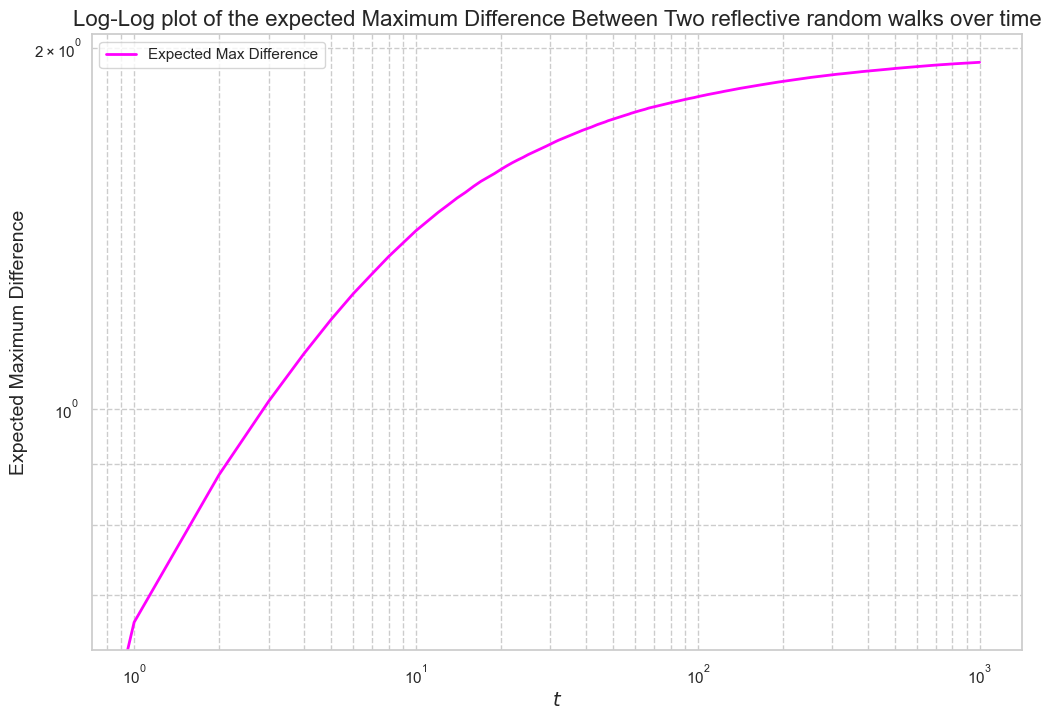

In [13]:
# Plotting the expected maximum difference using a log-log plot
plt.figure(figsize=(12, 8))
plt.loglog(expected_max_diffs, label='Expected Max Difference', color='magenta', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel('Expected Maximum Difference', fontsize=14)
plt.title('Log-Log plot of the expected Maximum Difference Between Two reflective random walks over time', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

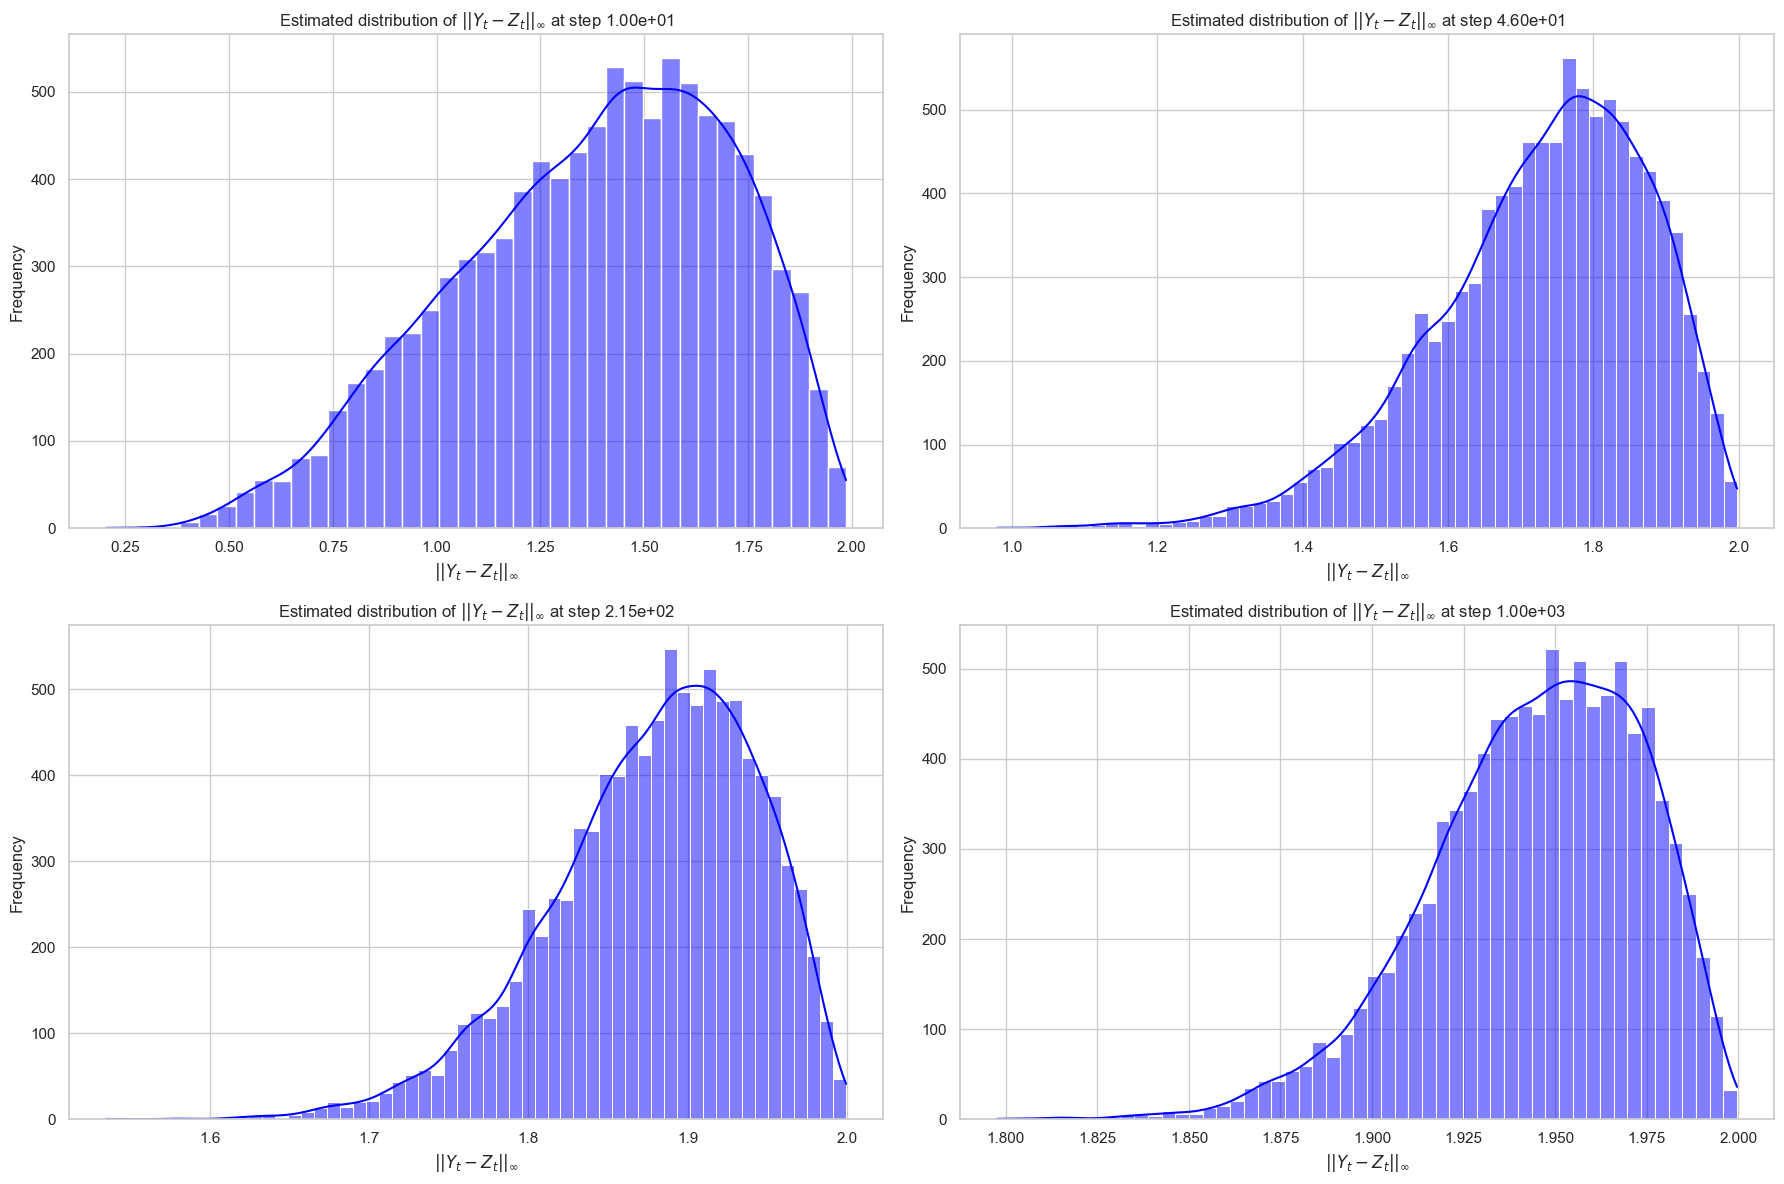

In [14]:
start_step = 10  # Start at 10 steps
selected_steps = np.logspace(np.log10(start_step), np.log10(n_steps), 4, dtype=int)  # Select 4 time steps using logspace

# Set up plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Create a subplot grid
axes = axes.flatten()  # Flatten the array of axes

for i, step in enumerate(selected_steps):
    sns.histplot(max_diffs_all_simulations[:, step-1], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(r'Estimated distribution of $||Y_t-Z_t||_{\infty}$ at step '+f'{step:.2e}')  # Use scientific notation with 2 decimal places for the step number
    axes[i].set_xlabel(r'$||Y_t-Z_t||_{\infty}$')
    axes[i].set_ylabel('Frequency')

# Remove extra subplot (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

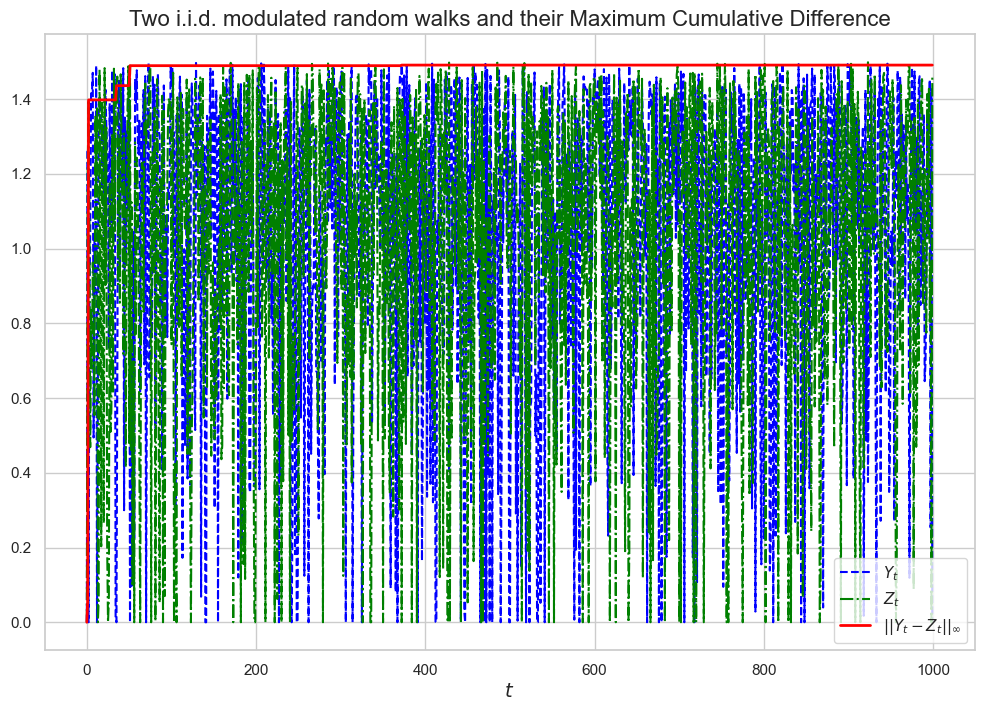

In [15]:
processes = simulate_positive_recurrent_modulated_random_walk(n_steps, 2, seed=random_seed)
Y = processes[0]
Z = processes[1]

# Calculate the absolute differences and the cumulative maximum difference
abs_diff = np.abs(Y - Z)
max_diff_cumulative = np.maximum.accumulate(abs_diff)

# Plotting with high contrast colors and LaTeX labels
plt.figure(figsize=(12, 8))
plt.plot(Y, label=r'$Y_t$', linestyle='--', color='blue')
plt.plot(Z, label=r'$Z_t$', linestyle='-.', color='green')
plt.plot(max_diff_cumulative, label=r'$||Y_t-Z_t||_{\infty}$', color='red', linewidth=2)
plt.xlabel(r'$t$', fontsize=14)
plt.title('Two i.i.d. modulated random walks and their Maximum Cumulative Difference', fontsize=16)
plt.legend(loc='lower right')
plt.show()


In [16]:
raw_data = simulate_positive_recurrent_modulated_random_walk(10, 100)
data=raw_data[:, 1:]  # Remove the first column (all zeroes)

In [17]:
raw_x = simulate_positive_recurrent_modulated_random_walk(10, 10)
x = raw_x[:, 1:]  # Remove the first column (all zeroes)

In [18]:
halfspace(x=x, data=data)

In [ ]:
simplicial(x=x, data=data)

array([3.65345013e-03, 9.29729868e-02, 9.98922531e-04, 9.09664709e-04,
       7.65067039e-07, 1.07833649e-02, 7.65067039e-07, 9.72374704e-03,
       1.06165803e-03, 3.35354385e-04])

In [ ]:
betaSkeleton(x=x, data=data)

array([0.57151515, 0.29414141, 0.2240404 , 0.49474747, 0.08363636,
       0.63717172, 0.53777778, 0.20161616, 0.54262626, 0.39030303])

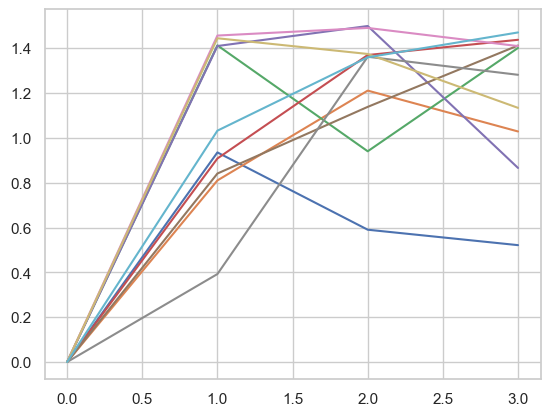

In [ ]:
plt.plot(raw_x.transpose())

In [61]:
from utils.kernel_estimation import nadaraya_watson_marginal_pdf, nadaraya_watson_marginal_cdf, nadaraya_watson_marginal_cdf_direct, nadaraya_watson_average_marginal_cdf, nadaraya_watson_average_marginal_cdf_direct, nadaraya_watson_average_marginal_pdf
from utils.simulate_markov import simulate_ar1_process, NORMAL_NOISE, UNIFORM_NOISE
from scipy.stats import norm, uniform

In [62]:
n_steps = 10**2
M = 100

In [63]:
# Parameters of the AR(1) process X_t=phi*X_{t-1}+\epsilon_t
phi=0.85
sigma=1  # Variance of the Normal distribution \epsilon_t~N(0,sigma)
initial_value = 0

In [64]:
ar_1_simulations = simulate_ar1_process(n_steps=n_steps, phi=phi, sigma=sigma, initial_value=initial_value, num_processes=M, seed=random_seed)

In [65]:
data = ar_1_simulations[0]

In [66]:
x = data[10]
print(x)

2.0887871461522622


In [67]:
inverse_bandwidth = np.power(n_steps, 1/5)

In [68]:
marginal_dist = nadaraya_watson_marginal_pdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_dist = nadaraya_watson_average_marginal_pdf(x=x, samples=ar_1_simulations,  inverse_bandwidth=inverse_bandwidth)

In [69]:
mean = phi*x
sigma = 1

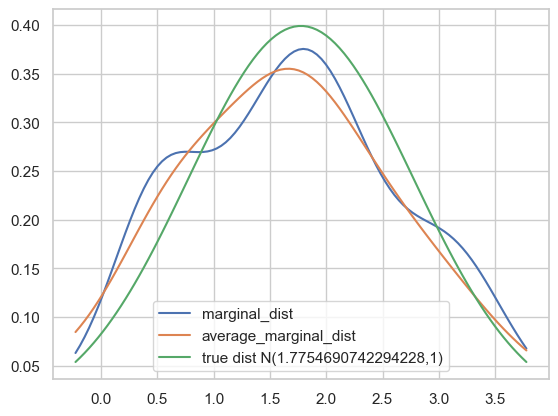

In [70]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_dist(t) for t in t_values])
yy_values=np.array([average_marginal_dist(t) for t in t_values])
true_values = norm.pdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()

In [71]:
marginal_cdf = nadaraya_watson_marginal_cdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_cdf = nadaraya_watson_average_marginal_cdf(x=x, samples=ar_1_simulations, inverse_bandwidth=inverse_bandwidth)

In [72]:
marginal_direct_cdf = nadaraya_watson_marginal_cdf_direct(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_direct_cdf = nadaraya_watson_average_marginal_cdf_direct(x=x, samples=ar_1_simulations, inverse_bandwidth=inverse_bandwidth)

1.6438370940812792

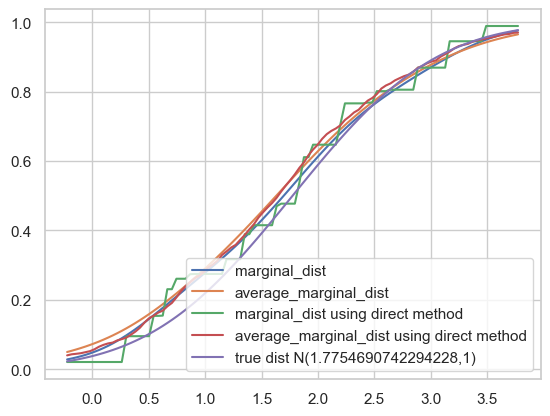

In [73]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([average_marginal_cdf(t) for t in t_values])
z_values = np.array([marginal_direct_cdf(t) for t in t_values])
zz_values = np.array([average_marginal_direct_cdf(t) for t in t_values])
true_values = norm.cdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, z_values, label='marginal_dist using direct method')
plt.plot(t_values, zz_values, label='average_marginal_dist using direct method')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()
mse_direct_cdf = np.mean([(marginal_direct_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_nw_cdf = np.mean([(marginal_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_direct_cdf/mse_nw_cdf

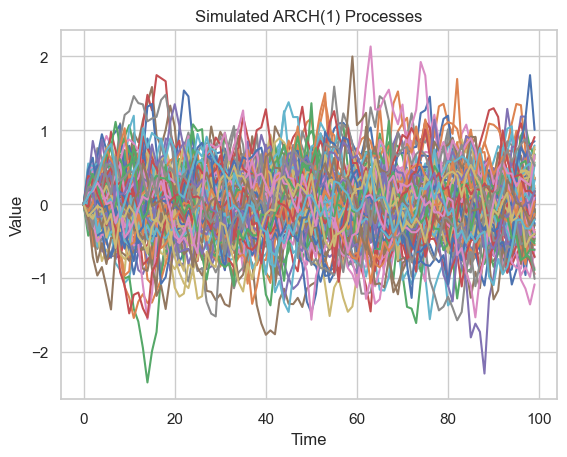

In [74]:
# Define conditional mean and standard deviation functions
def mean_fn(x):
    return phi * x

def sigma_fn(x):
    return 0.2 + 0.1 * np.abs(x)

# Simulate an ARCH(1) process with an initial value of 1.0
arch_simulations = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=sigma_fn, 
    initial_value=0, 
    num_processes=M, 
    seed=random_seed,
    noise=NORMAL_NOISE
)

for i in range(arch_simulations.shape[0]):
    plt.plot(arch_simulations[i, :], label=f"Process {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated ARCH(1) Processes")
# plt.legend()
plt.show()

In [75]:
data = arch_simulations[0]
x=data[20]

In [76]:
marginal_cdf = nadaraya_watson_marginal_cdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_direct_cdf = nadaraya_watson_marginal_cdf_direct(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_dist = nadaraya_watson_marginal_pdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_dist = nadaraya_watson_average_marginal_pdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_cdf = nadaraya_watson_average_marginal_cdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_direct_cdf = nadaraya_watson_average_marginal_cdf_direct(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)

In [77]:
mean = mean_fn(x)
sigma = sigma_fn(x)

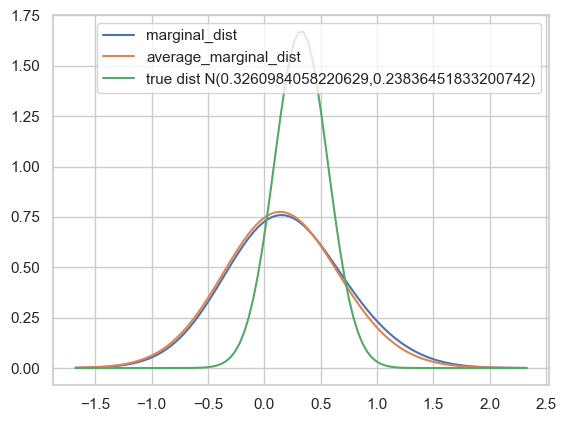

In [78]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_dist(t) for t in t_values])
yy_values=np.array([average_marginal_dist(t) for t in t_values])
true_values = norm.pdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()

0.6346058154806047

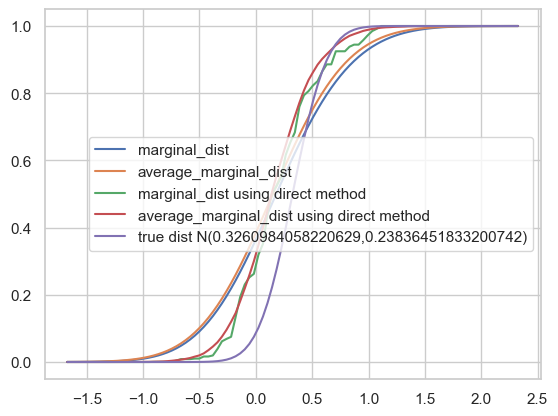

In [79]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([average_marginal_cdf(t) for t in t_values])
z_values = np.array([marginal_direct_cdf(t) for t in t_values])
zz_values = np.array([average_marginal_direct_cdf(t) for t in t_values])
true_values = norm.cdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, z_values, label='marginal_dist using direct method')
plt.plot(t_values, zz_values, label='average_marginal_dist using direct method')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()
mse_direct_cdf = np.mean([(marginal_direct_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_nw_cdf = np.mean([(marginal_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_direct_cdf/mse_nw_cdf

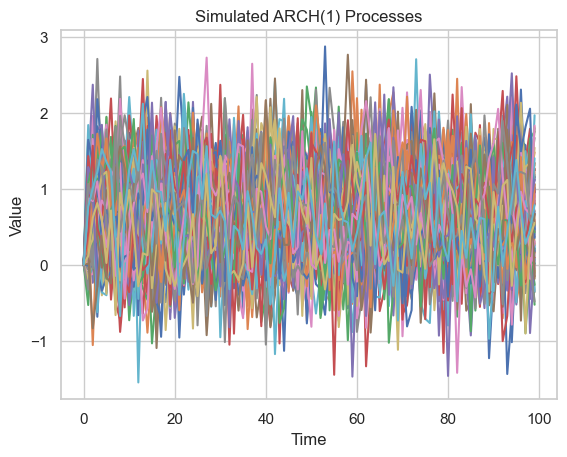

In [80]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

def volatility_function(x):
    # norm.pdf gives the probability density function of the standard normal distribution
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

# Simulate an ARCH(1) process with an initial value of 1.0
arch_simulations = simulate_arch_1_process(
    n_steps=n_steps, 
    m=logistic_function, 
    sigma=volatility_function, 
    initial_value=0, 
    num_processes=M, 
    seed=random_seed,
    noise=NORMAL_NOISE
)

for i in range(arch_simulations.shape[0]):
    plt.plot(arch_simulations[i, :], label=f"Process {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated ARCH(1) Processes")
plt.show()

In [81]:
data = arch_simulations[0]
x=data[70]
marginal_cdf = nadaraya_watson_marginal_cdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_direct_cdf = nadaraya_watson_marginal_cdf_direct(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_dist = nadaraya_watson_marginal_pdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_dist = nadaraya_watson_average_marginal_pdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_cdf = nadaraya_watson_average_marginal_cdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_direct_cdf = nadaraya_watson_average_marginal_cdf_direct(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
mean = logistic_function(x)
sigma = volatility_function(x)

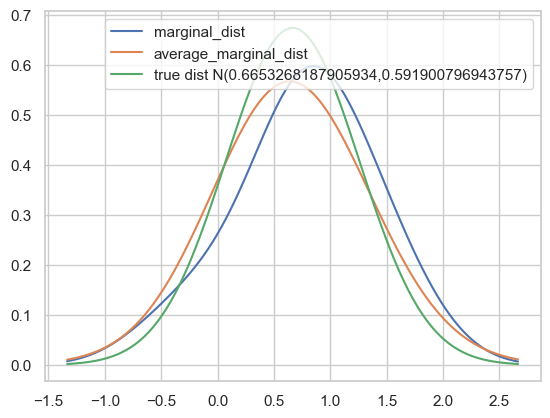

In [82]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_dist(t) for t in t_values])
yy_values = np.array([average_marginal_dist(t) for t in t_values])
true_values = norm.pdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()

1.1228973573259347

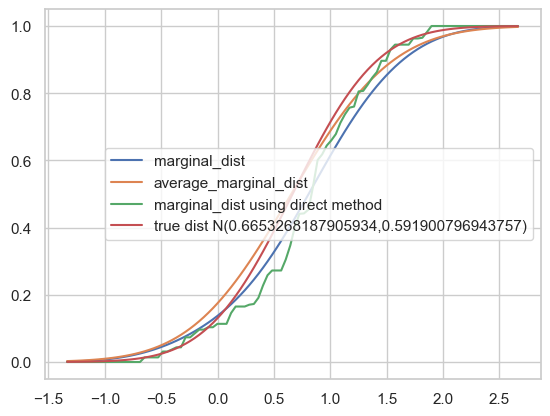

In [83]:
t_values = np.linspace(mean-2, mean+2, 100)
# Compute the values of the function for each t value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([average_marginal_cdf(t) for t in t_values])
z_values = np.array([marginal_direct_cdf(t) for t in t_values])
true_values = norm.cdf(t_values, mean, sigma)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, z_values, label='marginal_dist using direct method')
plt.plot(t_values, true_values, label=f'true dist N({mean},{sigma})')
plt.legend()
mse_direct_cdf = np.mean([(marginal_direct_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_nw_cdf = np.mean([(marginal_cdf(t)-norm.cdf(t, mean, sigma))**2 for t in t_values])
mse_direct_cdf/mse_nw_cdf

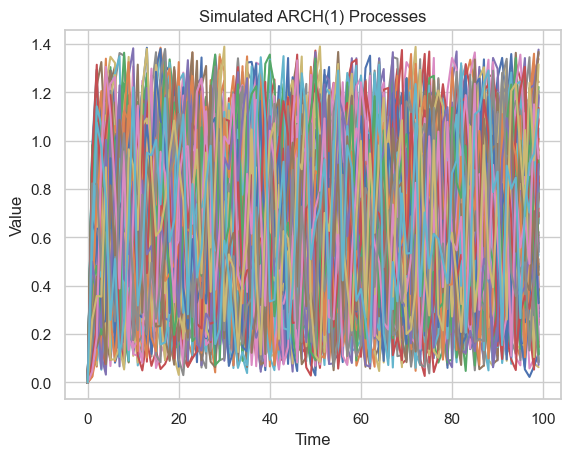

In [84]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

def volatility_function(x):
    # norm.pdf gives the probability density function of the standard normal distribution
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

# Simulate an ARCH(1) process with an initial value of 1.0
arch_simulations = simulate_arch_1_process(
    n_steps=n_steps, 
    m=logistic_function, 
    sigma=volatility_function, 
    initial_value=0, 
    num_processes=M, 
    seed=random_seed,
    noise=UNIFORM_NOISE
)

for i in range(arch_simulations.shape[0]):
    plt.plot(arch_simulations[i, :], label=f"Process {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated ARCH(1) Processes")
plt.show()

In [85]:
data = arch_simulations[0]
x=data[70]
marginal_cdf = nadaraya_watson_marginal_cdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_direct_cdf = nadaraya_watson_marginal_cdf_direct(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
marginal_dist = nadaraya_watson_marginal_pdf(x=x, data=data, inverse_bandwidth=inverse_bandwidth)
average_marginal_dist = nadaraya_watson_average_marginal_pdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_cdf = nadaraya_watson_average_marginal_cdf(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
average_marginal_direct_cdf = nadaraya_watson_average_marginal_cdf_direct(x=x, samples=arch_simulations, inverse_bandwidth=inverse_bandwidth)
mean = logistic_function(x)
sigma = volatility_function(x)

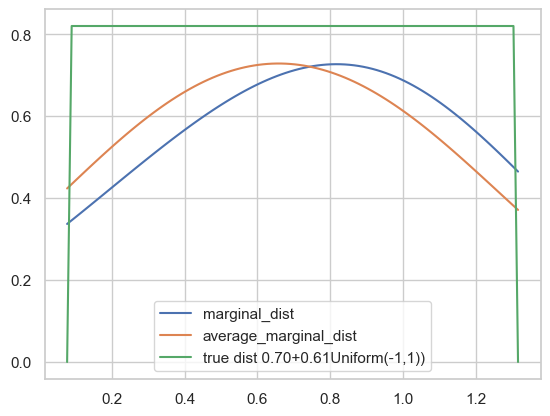

In [86]:
t_values = np.linspace(mean-sigma-0.01, mean+sigma+0.01, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_dist(t) for t in t_values])
yy_values = np.array([average_marginal_dist(t) for t in t_values])
# In scipy, the uniform distribution wih loc=loc and scale=scale
# is distributed as Uniform([loc,loc+scale])
true_dist = uniform(loc=mean-sigma, scale=2*sigma)
true_values = true_dist.pdf(t_values)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist {mean:.2f}+{sigma:.2f}Uniform(-1,1))')
plt.legend()

1.2206160368390644

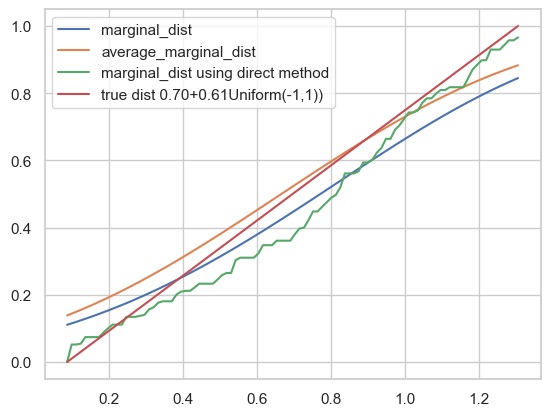

In [87]:
t_values = np.linspace(mean-sigma, mean+sigma, 100)
# Compute the values of the function for each t value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([average_marginal_cdf(t) for t in t_values])
z_values = np.array([marginal_direct_cdf(t) for t in t_values])
# In scipy, the uniform distribution wih loc=loc and scale=scale
# is distribution as Uniform([loc,loc+scale])
true_dist = uniform(loc=mean-sigma, scale=2*sigma)
true_values = true_dist.cdf(t_values)
plt.plot(t_values, y_values, label='marginal_dist')
plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, z_values, label='marginal_dist using direct method')
plt.plot(t_values, true_values, label=f'true dist {mean:.2f}+{sigma:.2f}Uniform(-1,1))')
plt.legend()
mse_direct_cdf = np.mean([(marginal_direct_cdf(t)-true_dist.cdf(t_values))**2 for t in t_values])
mse_nw_cdf = np.mean([(marginal_cdf(t)-true_dist.cdf(t_values))**2 for t in t_values])
mse_direct_cdf/mse_nw_cdf

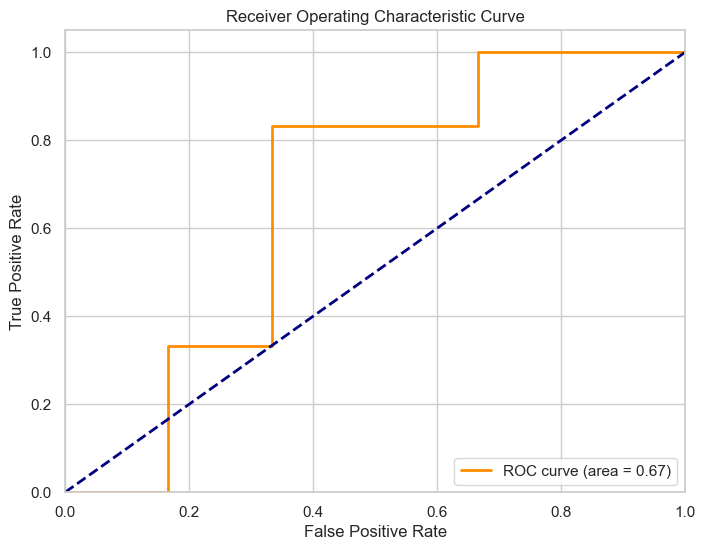

In [148]:

from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

y_true = [1,0,1,0,1,0,1,0,1,0,1,0]
y_predict = np.random.uniform(size=len(y_true))

fpr, tpr, thresholds = roc_curve(y_true, y_predict , pos_label=1)

# Get TPR and FPR from sklearn's roc_curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()